In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("Tarkaritraining.csv", low_memory=False)
df.head()

,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
1,Tomato Small(Local),6/16/2013,Kg,26,32,29
2,Potato Red,6/16/2013,Kg,20,21,20.5
3,Potato White,6/16/2013,Kg,15,16,15.5
4,Onion Dry (Indian),6/16/2013,Kg,28,30,29


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
pattern = r"^Rs\s+"
df["Minimum"] = pd.to_numeric(df["Minimum"].apply(lambda x: x if not str(x).startswith("Rs") else re.sub(pattern,"",str(x))))
df["Maximum"] = pd.to_numeric(df["Maximum"].apply(lambda x: x if not str(x).startswith("Rs") else re.sub(r"^Rs\s+", "",str(x))))
df["Average"] = pd.to_numeric(df["Average"].apply(lambda x: x if not str(x).startswith("Rs") else re.sub(r"^Rs\s+", "", str(x))))

In [5]:
df.Date = df.Date.astype(str)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [8]:
df.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,Month,Year
0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5,6,2013
1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0,6,2013
2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5,6,2013
3,Potato White,2013-06-16,Kg,15.0,16.0,15.5,6,2013
4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0,6,2013


In [9]:
df.dtypes

Commodity            object
Date         datetime64[ns]
Unit                 object
Minimum             float64
Maximum             float64
Average             float64
Month                 int64
Year                  int64
dtype: object

In [10]:
df.drop('Date', axis=1, inplace=True)

In [11]:
df.Year = df['Year'].astype(float)
df.Month = df['Month'].astype(float)

In [12]:
df.drop(['Maximum', 'Minimum'], axis=1, inplace=True)

In [13]:
df.head(3)

,Commodity,Unit,Average,Month,Year
0,Tomato Big(Nepali),Kg,37.5,6.0,2013.0
1,Tomato Small(Local),Kg,29.0,6.0,2013.0
2,Potato Red,Kg,20.5,6.0,2013.0


In [14]:
df.drop('Month', axis = 1, inplace = True)

In [15]:
df

,Commodity,Unit,Average,Year
0,Tomato Big(Nepali),Kg,37.50,2013.0
1,Tomato Small(Local),Kg,29.00,2013.0
2,Potato Red,Kg,20.50,2013.0
3,Potato White,Kg,15.50,2013.0
4,Onion Dry (Indian),Kg,29.00,2013.0
...,...,...,...,...
280857,Tomato Small(Indian),KG,50.00,2023.0
280858,Tomato Small(Local),KG,55.00,2023.0
280859,Tomato Small(Tunnel),KG,69.00,2023.0
280860,Turnip A,KG,75.00,2023.0


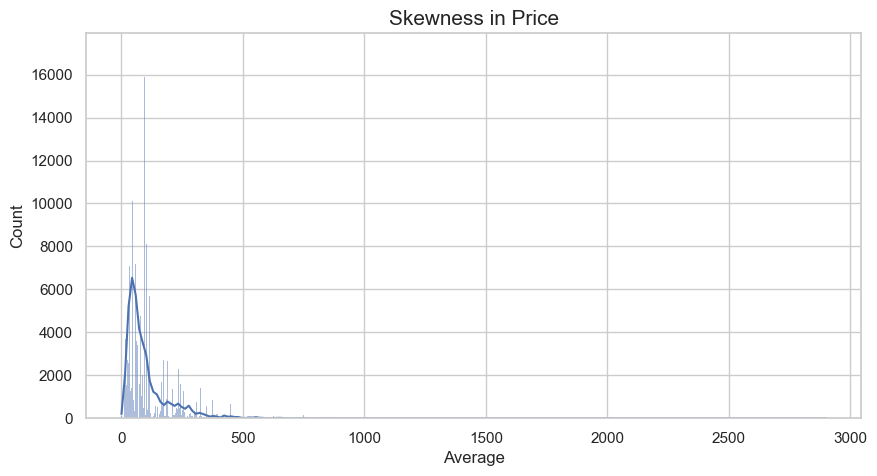

'-----------------------------------'

3.6027873087046953

In [18]:

sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
plt.title('Skewness in Price', fontsize = 15)
sns.set(font_scale = 1)
sns.histplot(df['Average'], kde = True)
plt.show()
display('-----------------------------------')
display(df['Average'].skew())

In [21]:
df['Average'] = np.log(df.Average + 1e-10)

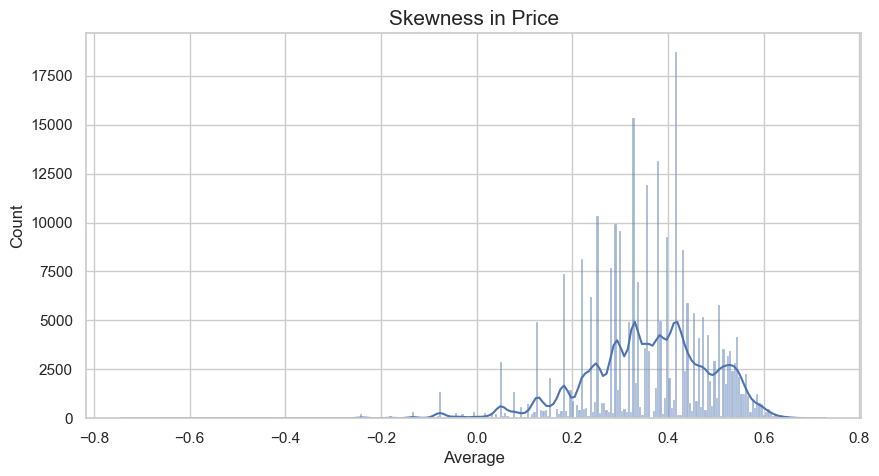

'-----------------------------------'

-0.6908830498502735

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
plt.title('Skewness in Price', fontsize = 15)
sns.set(font_scale = 1)
sns.histplot(df['Average'], kde = True)
plt.show()
display('-----------------------------------')
display(df['Average'].skew())

In [28]:
df4 = pd.get_dummies(df['Commodity'])

In [29]:
df4.head()

,Amla,Apple(Fuji),Apple(Jholey),Arum,Asparagus,Avocado,Bakula,Bamboo Shoot,Banana,Barela,...,Tomato Small(Indian),Tomato Small(Local),Tomato Small(Terai),Tomato Small(Tunnel),Tree Tomato,Turnip,Turnip A,Water Melon(Dotted),Water Melon(Green),Yam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df5 = df.copy()
df = pd.concat([df, df4], axis = 1)

In [51]:
df.head()

,Unit,Average,Year,Amla,Apple(Fuji),Apple(Jholey),Arum,Asparagus,Avocado,Bakula,...,Tomato Small(Indian),Tomato Small(Local),Tomato Small(Terai),Tomato Small(Tunnel),Tree Tomato,Turnip,Turnip A,Water Melon(Dotted),Water Melon(Green),Yam
0,Kg,0.252836,2013.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kg,0.194011,2013.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Kg,0.100205,2013.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kg,0.008230,2013.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kg,0.194011,2013.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df.drop('Unit', axis = 1, inplace = True)

In [53]:
df.head()

,Average,Year,Amla,Apple(Fuji),Apple(Jholey),Arum,Asparagus,Avocado,Bakula,Bamboo Shoot,...,Tomato Small(Indian),Tomato Small(Local),Tomato Small(Terai),Tomato Small(Tunnel),Tree Tomato,Turnip,Turnip A,Water Melon(Dotted),Water Melon(Green),Yam
0,0.252836,2013.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.194011,2013.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.100205,2013.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.008230,2013.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.194011,2013.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df = df.dropna()

In [60]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

C:\Users\User\AppData\Local\Temp\ipykernel_6212\196708491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [67]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [61]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Average', axis = 1),
 df.Average, test_size = 0.1)

In [62]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [65]:
mse = mean_squared_error(y_pred, y_test)
accuracy = model.score(x_test, y_test) * 100

print("MACHINE LEARNING MODEL'S MEAN SQUARE ERROR\t:\t", mse)
print("MACHINE LEARNING MODEL'S ACCURACY\t\t:\t", accuracy, '%')

MACHINE LEARNING MODEL'S MEAN SQUARE ERROR	:	 0.005129780534968727
MACHINE LEARNING MODEL'S ACCURACY		:	 69.85466961224058 %
